In [39]:
import hda
import os
import json
import xarray as xr
import netCDF4
import scipy
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.animation as anim
import cartopy
from IPython.display import HTML, display


#HOME=os.environ['HOME']
working_path=r'C:\Users\jegom\Desktop\clorop\dtos'

Config file creation

In [19]:
username='username'
password='pass'

fileString=(f'url: https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker \nuser: {username} \npassword: {password}')
with open(os.path.join(HOME,'.hdarc'),'w') as f:
    f.write(fileString)


AOI and dates

In [6]:
aoi_west=-1.0945558329063318
aoi_south=57.89502995465028
aoi_east=8.544131744111414
aoi_north=63.16971059837563
aoi=[aoi_west,aoi_south,aoi_east,aoi_north]

start_date='2021-04-01T00:00:00.000Z'
end_date='2021-06-15T00:00:00.000Z'

with open(r'C:\Users\jegom\Desktop\clorop\descriptor.json','r') as f:
    data=json.load(f)
data['boundingBoxValues'][0]['bbox']=aoi
data['dateRangeSelectValues'][0]['start']=start_date
data['dateRangeSelectValues'][0]['end']=end_date


In [7]:
c=hda.Client(debug=True)
matches=c.search(data)
os.chdir(working_path)
matches.download()
    

2022-06-30 21:18:05,059 DEBUG HDA {'url': 'https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker', 'token': None, 'user': 'jegomezg', 'password': 'Jose123321', 'quiet': False, 'verify': False, 'timeout': None, 'sleep_max': 120, 'retry_max': 500, 'progress': True}
2022-06-30 21:18:05,060 DEBUG ===> GET https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/gettoken
2022-06-30 21:18:05,062 DEBUG Starting new HTTPS connection (1): wekeo-broker.apps.mercator.dpi.wekeo.eu:443
2022-06-30 21:18:05,665 DEBUG https://wekeo-broker.apps.mercator.dpi.wekeo.eu:443 "GET /databroker/gettoken HTTP/1.1" 200 61
2022-06-30 21:18:05,666 DEBUG <=== {"access_token": "a05f7553-17ea-35fd-8a5e-9e5c56a7ee26"}
2022-06-30 21:18:05,666 DEBUG Token is a05f7553-17ea-35fd-8a5e-9e5c56a7ee26
2022-06-30 21:18:05,666 DEBUG ===> POST https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/datarequest
2022-06-30 21:18:05,667 DEBUG ===> POST {"datasetId": "EO:MO:DAT:OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_06

DATA

In [3]:
files = [file for file in os.listdir(working_path) if (file.endswith('.nc'))]
ds=xr.open_dataset(os.path.join(working_path,files[0]))
da = ds['MICRO']


c:\Users\jegom\Anaconda3\envs\SD2022_geoenv\lib\site-packages\xarray\conventions.py:516: SerializationWarning: variable 'MICRO' has multiple fill values {-999.0, 9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [20]:
# Create figure
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(ds.time.values.astype('str')), y=list(ds['MICRO'].mean(axis=(1,2)).values)))
# Set title
fig.update_layout(
    title_text="Mean Chlorophylle Concentration Time Series")


# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

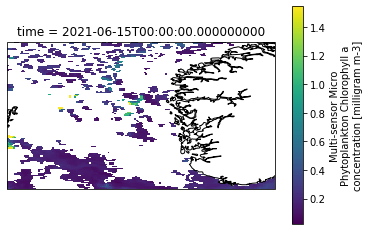

In [45]:
variable = ds['MICRO']
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
image = variable.isel(time = 0).plot.imshow(ax=ax, transform=ccrs.PlateCarree(), animated=True)
ax.coastlines()
def update(t):
    # Update the plot for a specific time
    ax.set_title("time = %s"%t)
    image.set_array(variable.sel(time=t))
    return image,
animation = anim.FuncAnimation(fig, update, frames=variable.time.values, blit=False)
HTML(animation.to_jshtml())
